# Python packages for graph analysis
- igraph\-python : https://igraph.org/python/
- networkx : https://networkx.github.io/documentation/stable

In [41]:
! pip install networkx

In [42]:
import networkx as nx

import pandas as pd
from pandas import DataFrame, Series
import numpy as np

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
# load dataset
df_people = pd.read_csv('/content/drive/MyDrive/데이터마이닝 과제/people_20.csv', encoding='euc-kr')
df_suggest = pd.read_csv('/content/drive/MyDrive/데이터마이닝 과제/suggest_20.csv', encoding='euc-kr')

In [45]:
print(df_people.shape)
df_people.head()

(320, 10)


,번호,대수,의원명,정당,소속위원회,지역,성별,당선횟수,당선방법,party_index
0,1,20,강길부,무소속,NaN,울산 울주군,남,4선,지역구,0
1,2,20,강병원,더불어민주당,NaN,서울 은평구을,남,재선,지역구,1
2,3,20,강석진,새누리당,NaN,경남 산청군함양군거창군합천군,남,초선,지역구,2
3,4,20,강석호,새누리당,NaN,경북 영양군영덕군봉화군울진군,남,3선,지역구,2
4,5,20,강창일,더불어민주당,NaN,제주 제주시갑,남,4선,지역구,1


In [46]:
print(df_suggest.shape)
df_suggest.head()

(3500, 15)


,BILL_ID,BILL_NO,BILL_NAME,COMMITTEE,PROPOSE_DT,PROC_RESULT,AGE,DETAIL_LINK,PROPOSER,MEMBER_LIST,RST_PROPOSER,PUBL_PROPOSER,keyword,COMMITTEE_index,BILL_index
0,PRC_B1A6Z0N7H2Q6C1C0D3N0Q5K6S5U4Y2,2001183,집단소송법안,법제사법위원회,2016-07-26,임기만료폐기,20,http://likms.assembly.go.kr/bill/billDetail.do...,박영선의원 등 46인,http://likms.assembly.go.kr/bill/coactorListPo...,박영선,"강훈식,기동민,김경수,김두관,김병욱,김상희,김성수,김영주,김영춘,김종민,김종인,김현...",집단소송,0,0
1,PRC_A1B9W1O1O0B8Z1N8C4Z1M4D0E5S3J4,2023701,수산업법 일부개정법률안,농림축산식품해양수산위원회,2019-11-08,대안반영폐기,20,http://likms.assembly.go.kr/bill/billDetail.do...,박주현의원 등 10인,http://likms.assembly.go.kr/bill/coactorListPo...,박주현,"강석진,경대수,김성찬,손금주,손혜원,오영훈,윤준호,이양수,황주홍",수산업,1,1
2,PRC_G1C6M0U8R1O1O0A9C4G1S1I3M7J8J4,2001532,자동차관리법 일부개정법률안,국토교통위원회,2016-08-11,임기만료폐기,20,http://likms.assembly.go.kr/bill/billDetail.do...,임종성의원 등 11인,http://likms.assembly.go.kr/bill/coactorListPo...,임종성,"강병원,김경협,김병욱,김철민,민홍철,소병훈,안호영,윤후덕,전현희,최경환",자동차관리법,2,2
3,PRC_E1H6R1P1W2U9L1N6D5U7M4W8D6K0G1,2003948,집합건물의 소유 및 관리에 관한 법률 일부개정법률안,법제사법위원회,2016-11-29,임기만료폐기,20,http://likms.assembly.go.kr/bill/billDetail.do...,전현희의원 등 10인,http://likms.assembly.go.kr/bill/coactorListPo...,전현희,"기동민,김영춘,노웅래,박선숙,손혜원,윤호중,윤후덕,임종성,정성호","집합,건물,소유",0,3
4,PRC_P1B7H0I8V3O0D1H4O2O9F2A1I4T6U3,2008863,장기공공임대주택 입주자 삶의 질 향상 지원법 일부개정법률안,국토교통위원회,2017-08-30,수정가결,20,http://likms.assembly.go.kr/bill/billDetail.do...,전현희의원 등 10인,http://likms.assembly.go.kr/bill/coactorListPo...,전현희,"김정우,신창현,안규백,안호영,윤관석,이원욱,임종성,주승용,한정애","장기,임대주택,주자,향상",2,4


In [47]:
df_people.columns

Index(['번호', '대수', '의원명', '정당', '소속위원회', '지역', '성별', '당선횟수', '당선방법',
       'party_index'],
      dtype='object')

In [48]:
df_suggest.columns

Index(['BILL_ID', 'BILL_NO', 'BILL_NAME', 'COMMITTEE', 'PROPOSE_DT',
       'PROC_RESULT', 'AGE', 'DETAIL_LINK', 'PROPOSER', 'MEMBER_LIST',
       'RST_PROPOSER', 'PUBL_PROPOSER', 'keyword', 'COMMITTEE_index',
       'BILL_index'],
      dtype='object')

## Create a undirected graph
- nodes : 입법발의안 대표발의자 국회의원 ('RST_PROPOSER')-
입법발의안 공동발의자 국회의원 ('PUBL_PROPOSER',
suggest_20.csv)

- edges : 입법발의안 공동으로 발의한 경우

- node feature : 국회의원 소속 정당 ('party_index', people_20.csv)

-  edge feature : 입법발의안 ('BILL_index', suggest_20.csv) 

In [49]:
rst = df_suggest.loc[:, ('RST_PROPOSER')].dropna().values.tolist()
total = []
for i in range(len(rst)):
  publ = df_suggest.PUBL_PROPOSER.iloc[i].split(',') 
  for j in publ:
    temp = []
    temp.append(rst[i])
    temp.append(j)
    total.append(temp)
print(total)

[['박영선', '강훈식'], ['박영선', '기동민'], ['박영선', '김경수'], ['박영선', '김두관'], ['박영선', '김병욱'], ['박영선', '김상희'], ['박영선', '김성수'], ['박영선', '김영주'], ['박영선', '김영춘'], ['박영선', '김종민'], ['박영선', '김종인'], ['박영선', '김현권'], ['박영선', '노웅래'], ['박영선', '도종환'], ['박영선', '박경미'], ['박영선', '박범계'], ['박영선', '박완주'], ['박영선', '박정'], ['박영선', '박찬대'], ['박영선', '박홍근'], ['박영선', '백혜련'], ['박영선', '서영교'], ['박영선', '설훈'], ['박영선', '소병훈'], ['박영선', '송기헌'], ['박영선', '송옥주'], ['박영선', '신창현'], ['박영선', '심재권'], ['박영선', '어기구'], ['박영선', '위성곤'], ['박영선', '유동수'], ['박영선', '유은혜'], ['박영선', '윤관석'], ['박영선', '윤후덕'], ['박영선', '이용득'], ['박영선', '이원욱'], ['박영선', '이재정'], ['박영선', '이찬열'], ['박영선', '이춘석'], ['박영선', '이훈'], ['박영선', '전해철'], ['박영선', '제윤경'], ['박영선', '조승래'], ['박영선', '최운열'], ['박영선', '최인호'], ['박주현', '강석진'], ['박주현', '경대수'], ['박주현', '김성찬'], ['박주현', '손금주'], ['박주현', '손혜원'], ['박주현', '오영훈'], ['박주현', '윤준호'], ['박주현', '이양수'], ['박주현', '황주홍'], ['임종성', '강병원'], ['임종성', '김경협'], ['임종성', '김병욱'], ['임종성', '김철민'], ['임종성', '민홍철'], ['임종성', '소병훈'], ['임종성', '안호영'], ['임종성', '윤후덕'], ['임종성', '전

In [50]:
graph = nx.Graph(total) # [(vs_id, vs_id)]

In [51]:
graph.nodes

NodeView(('박영선', '강훈식', '기동민', '김경수', '김두관', '김병욱', '김상희', '김성수', '김영주', '김영춘', '김종민', '김종인', '김현권', '노웅래', '도종환', '박경미', '박범계', '박완주', '박정', '박찬대', '박홍근', '백혜련', '서영교', '설훈', '소병훈', '송기헌', '송옥주', '신창현', '심재권', '어기구', '위성곤', '유동수', '유은혜', '윤관석', '윤후덕', '이용득', '이원욱', '이재정', '이찬열', '이춘석', '이훈', '전해철', '제윤경', '조승래', '최운열', '최인호', '박주현', '강석진', '경대수', '김성찬', '손금주', '손혜원', '오영훈', '윤준호', '이양수', '황주홍', '임종성', '강병원', '김경협', '김철민', '민홍철', '안호영', '전현희', '최경환', '박선숙', '윤호중', '정성호', '김정우', '안규백', '주승용', '한정애', '최도자', '김삼화', '김종회', '윤소하', '윤영일', '이동섭', '정동영', '정세균', '하태경', '송갑석', '심기준', '인재근', '조정식', '이용호', '장병완', '장정숙', '최명길', '김경진', '김수민', '유성엽', '신동근', '김민기', '김영호', '문진국', '원혜영', '오신환', '김현아', '박덕흠', '박명재', '유의동', '이우현', '홍철호', '황영철', '박광온', '권칠승', '김해영', '김현미', '문미옥', '신경민', '이석현', '이수혁', '이인영', '전혜숙', '안민석', '전재수', '정춘숙', '홍의락', '곽상도', '강석호', '권석창', '김석기', '김종석', '염동열', '유기준', '이완영', '이종명', '함진규', '윤종필', '김명연', '김순례', '나경원', '신보라', '원유철', '이종배', '임이자', '조훈현', '권은희', '김관영', '김광수', '윤종오', '정태옥',

In [52]:
graph.edges

EdgeView([('박영선', '강훈식'), ('박영선', '기동민'), ('박영선', '김경수'), ('박영선', '김두관'), ('박영선', '김병욱'), ('박영선', '김상희'), ('박영선', '김성수'), ('박영선', '김영주'), ('박영선', '김영춘'), ('박영선', '김종민'), ('박영선', '김종인'), ('박영선', '김현권'), ('박영선', '노웅래'), ('박영선', '도종환'), ('박영선', '박경미'), ('박영선', '박범계'), ('박영선', '박완주'), ('박영선', '박정'), ('박영선', '박찬대'), ('박영선', '박홍근'), ('박영선', '백혜련'), ('박영선', '서영교'), ('박영선', '설훈'), ('박영선', '소병훈'), ('박영선', '송기헌'), ('박영선', '송옥주'), ('박영선', '신창현'), ('박영선', '심재권'), ('박영선', '어기구'), ('박영선', '위성곤'), ('박영선', '유동수'), ('박영선', '유은혜'), ('박영선', '윤관석'), ('박영선', '윤후덕'), ('박영선', '이용득'), ('박영선', '이원욱'), ('박영선', '이재정'), ('박영선', '이찬열'), ('박영선', '이춘석'), ('박영선', '이훈'), ('박영선', '전해철'), ('박영선', '제윤경'), ('박영선', '조승래'), ('박영선', '최운열'), ('박영선', '최인호'), ('박영선', '박광온'), ('박영선', '강병원'), ('박영선', '김부겸'), ('박영선', '문미옥'), ('박영선', '변재일'), ('박영선', '신경민'), ('박영선', '금태섭'), ('박영선', '김현미'), ('박영선', '이학영'), ('박영선', '안민석'), ('박영선', '조훈현'), ('박영선', '오영훈'), ('박영선', '김병기'), ('박영선', '유승희'), ('박영선', '손혜원'), ('박영선', '김정우'), ('박영선', '남인순'), (

In [53]:
len(graph.nodes)  

318

In [54]:
len(graph.edges)

11889

- Accessing neighbors and edges

In [94]:
graph.degree()

DegreeView({'박영선': 84, '강훈식': 98, '기동민': 99, '김경수': 51, '김두관': 59, '김병욱': 93, '김상희': 116, '김성수': 83, '김영주': 59, '김영춘': 108, '김종민': 97, '김종인': 2, '김현권': 96, '노웅래': 132, '도종환': 71, '박경미': 98, '박범계': 68, '박완주': 88, '박정': 125, '박찬대': 96, '박홍근': 175, '백혜련': 106, '서영교': 141, '설훈': 100, '소병훈': 117, '송기헌': 90, '송옥주': 129, '신창현': 121, '심재권': 114, '어기구': 103, '위성곤': 97, '유동수': 120, '유은혜': 89, '윤관석': 123, '윤후덕': 113, '이용득': 89, '이원욱': 118, '이재정': 85, '이찬열': 140, '이춘석': 83, '이훈': 71, '전해철': 69, '제윤경': 105, '조승래': 120, '최운열': 90, '최인호': 116, '박주현': 47, '강석진': 69, '경대수': 77, '김성찬': 92, '손금주': 81, '손혜원': 81, '오영훈': 109, '윤준호': 61, '이양수': 74, '황주홍': 142, '임종성': 103, '강병원': 100, '김경협': 99, '김철민': 120, '민홍철': 111, '안호영': 90, '전현희': 99, '최경환': 73, '박선숙': 75, '윤호중': 77, '정성호': 117, '김정우': 113, '안규백': 106, '주승용': 74, '한정애': 117, '최도자': 106, '김삼화': 73, '김종회': 77, '윤소하': 81, '윤영일': 83, '이동섭': 97, '정동영': 91, '정세균': 74, '하태경': 96, '송갑석': 70, '심기준': 62, '인재근': 76, '조정식': 87, '이용호': 73, '장병완': 60, '장정숙': 73, '최명

## Adding attributes to nodes, and edges

### Node attributes

In [81]:
nx.set_node_attributes(graph, df_people.set_index('의원명')['party_index'], 'party_index')

In [82]:
graph.nodes.data()

NodeDataView({'박영선': {'party_index': 1}, '강훈식': {'party_index': 1}, '기동민': {'party_index': 1}, '김경수': {'party_index': 1}, '김두관': {'party_index': 1}, '김병욱': {'party_index': 1}, '김상희': {'party_index': 1}, '김성수': {'party_index': 1}, '김영주': {'party_index': 1}, '김영춘': {'party_index': 1}, '김종민': {'party_index': 1}, '김종인': {'party_index': 1}, '김현권': {'party_index': 1}, '노웅래': {'party_index': 1}, '도종환': {'party_index': 1}, '박경미': {'party_index': 1}, '박범계': {'party_index': 1}, '박완주': {'party_index': 1}, '박정': {'party_index': 1}, '박찬대': {'party_index': 1}, '박홍근': {'party_index': 1}, '백혜련': {'party_index': 1}, '서영교': {'party_index': 1}, '설훈': {'party_index': 1}, '소병훈': {'party_index': 1}, '송기헌': {'party_index': 1}, '송옥주': {'party_index': 1}, '신창현': {'party_index': 1}, '심재권': {'party_index': 1}, '어기구': {'party_index': 2}, '위성곤': {'party_index': 1}, '유동수': {'party_index': 1}, '유은혜': {'party_index': 1}, '윤관석': {'party_index': 1}, '윤후덕': {'party_index': 1}, '이용득': {'party_index': 1}, '이원욱': {'party_i

### Edge attributes

In [58]:
edge_attr = df_suggest.loc[:, ('RST_PROPOSER', 'PUBL_PROPOSER', 'BILL_index')].dropna()

In [59]:
print(edge_attr)

     RST_PROPOSER  ... BILL_index
0             박영선  ...          0
1             박주현  ...          1
2             임종성  ...          2
3             전현희  ...          3
4             전현희  ...          4
...           ...  ...        ...
3495          서영교  ...        154
3496          황주홍  ...       1074
3497          전혜숙  ...        434
3498          백승주  ...         20
3499          박준영  ...        135

[3500 rows x 3 columns]


In [60]:
rst = df_suggest.loc[:, ('RST_PROPOSER')].dropna().values.tolist()
bill = df_suggest.loc[:, ('BILL_index')].dropna().values.tolist()
RST_PROPOSER = []
PUBL_PROPOSER = []
BILL_index = []
for i in range(len(rst)):
  publ = df_suggest.PUBL_PROPOSER.iloc[i].split(',') 
  for j in publ:
    RST_PROPOSER.append(rst[i])
    PUBL_PROPOSER.append(j)
    BILL_index.append(bill[i])

In [61]:
new_suggest = pd.DataFrame({'RST_PROPOSER': RST_PROPOSER, 'PUBL_PROPOSER':PUBL_PROPOSER,
                             'BILL_index':BILL_index})

In [62]:
new_suggest.shape

(39509, 3)

In [63]:
new_suggest.head(5)

,RST_PROPOSER,PUBL_PROPOSER,BILL_index
0,박영선,강훈식,0
1,박영선,기동민,0
2,박영선,김경수,0
3,박영선,김두관,0
4,박영선,김병욱,0


In [64]:
nx.set_edge_attributes(graph, new_suggest.set_index(['RST_PROPOSER', 'PUBL_PROPOSER'])['BILL_index'], 'BILL_index')

In [65]:
graph.edges.data()

EdgeDataView([('박영선', '강훈식', {'BILL_index': 60}), ('박영선', '기동민', {'BILL_index': 0}), ('박영선', '김경수', {'BILL_index': 0}), ('박영선', '김두관', {'BILL_index': 180}), ('박영선', '김병욱', {'BILL_index': 0}), ('박영선', '김상희', {'BILL_index': 60}), ('박영선', '김성수', {'BILL_index': 944}), ('박영선', '김영주', {'BILL_index': 60}), ('박영선', '김영춘', {'BILL_index': 0}), ('박영선', '김종민', {'BILL_index': 60}), ('박영선', '김종인', {'BILL_index': 0}), ('박영선', '김현권', {'BILL_index': 0}), ('박영선', '노웅래', {'BILL_index': 60}), ('박영선', '도종환', {'BILL_index': 895}), ('박영선', '박경미', {'BILL_index': 0}), ('박영선', '박범계', {'BILL_index': 35}), ('박영선', '박완주', {'BILL_index': 60}), ('박영선', '박정', {'BILL_index': 1005}), ('박영선', '박찬대', {'BILL_index': 0}), ('박영선', '박홍근', {'BILL_index': 60}), ('박영선', '백혜련', {'BILL_index': 31}), ('박영선', '서영교', {'BILL_index': 65}), ('박영선', '설훈', {'BILL_index': 60}), ('박영선', '소병훈', {'BILL_index': 60}), ('박영선', '송기헌', {'BILL_index': 150}), ('박영선', '송옥주', {'BILL_index': 65}), ('박영선', '신창현', {'BILL_index': 65}), ('박영선', '심재권', {'B

## Analyze a graph 

In [66]:
def viewer(_dict_data, col_name):
    df = pd.DataFrame().from_dict(_dict_data, orient='index', columns=[col_name])
    print(df.sort_values(col_name, ascending=False).head(10))
    return df

### Page Rank
- Reference : [networkx.algorithms.link_analysis.pagerank_alg.pagerank](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html#networkx.algorithms.link_analysis.pagerank_alg.pagerank)

In [67]:
pagerank = nx.pagerank(graph)

In [68]:
pagerank = viewer(pagerank, 'pagerank')
pagerank

     pagerank
박홍근  0.006647
이철희  0.006503
김성태  0.006068
이완영  0.005816
안민석  0.005552
황주홍  0.005495
나경원  0.005406
이찬열  0.005338
서영교  0.005293
박주민  0.005144


,pagerank
박영선,0.003495
강훈식,0.003764
기동민,0.003805
김경수,0.002165
김두관,0.002453
...,...
안철수,0.000615
서청원,0.001289
박병석,0.001675
조응천,0.002227


### Node Centrality
- degree centrality : 연결된 node가 많을 수록 큼. `nx.degree_centrality(g), nx.in_degree_centrality(g), nx.out_degree_centrality(g)`
- closeness centrality : 모든 node와의 거리가 가까울 수록 큼. `nx.closeness_centrality(g)`
- betweenness centrality : 노드 간의 경로에 있을 수록 큼. `nx.betweenness centrality(g, normalized=True)`
- eigenvector centrality : 큰 네트워크와 연결되있는 사람일 수록 큼. `nx.eigenvector_centrality(g)`
- *Reference* : [Centrality](https://networkx.github.io/documentation/stable/reference/algorithms/centrality.html)

In [69]:
degree_centrality = nx.degree_centrality(graph)
degree_centrality = viewer(degree_centrality, 'degree_centrality')
degree_centrality

     degree_centrality
박홍근           0.552050
이철희           0.545741
안민석           0.470032
김성태           0.454259
황주홍           0.447950
서영교           0.444795
이찬열           0.441640
박주민           0.432177
이완영           0.429022
노웅래           0.416404


,degree_centrality
박영선,0.264984
강훈식,0.309148
기동민,0.312303
김경수,0.160883
김두관,0.186120
...,...
안철수,0.012618
서청원,0.066246
박병석,0.113565
조응천,0.164038


In [84]:
closeness_centrality = nx.closeness_centrality(graph)
closeness_centrality = viewer(closeness_centrality, 'closeness_centrality')
closeness_centrality

     closeness_centrality
이철희              0.680258
박홍근              0.678801
안민석              0.652263
황주홍              0.643002
이찬열              0.641700
서영교              0.641700
김성태              0.640404
박주민              0.635271
이완영              0.632735
노웅래              0.630219


,closeness_centrality
박영선,0.556140
강훈식,0.584871
기동민,0.580586
김경수,0.509646
김두관,0.531879
...,...
안철수,0.420424
서청원,0.428958
박병석,0.511290
조응천,0.500000


In [71]:
betweenness_centrality = nx.betweenness_centrality(graph,  normalized=True)
betweenness_centrality = viewer(betweenness_centrality, 'betweenness_centrality')
betweenness_centrality

     betweenness_centrality
황주홍                0.014434
최인호                0.013774
김현아                0.013087
박홍근                0.012291
이철희                0.011520
김성태                0.011421
이찬열                0.011361
이완영                0.010656
나경원                0.010338
정병국                0.009782


,betweenness_centrality
박영선,0.003956
강훈식,0.001942
기동민,0.001483
김경수,0.000213
김두관,0.000687
...,...
안철수,0.000000
서청원,0.000046
박병석,0.000274
조응천,0.000350


In [72]:
eigenvector_centrality = nx.eigenvector_centrality(graph)
eigenvector_centrality = viewer(eigenvector_centrality, 'eigenvector_centrality')
eigenvector_centrality

     eigenvector_centrality
박홍근                0.133180
이철희                0.131422
안민석                0.119710
서영교                0.112757
박주민                0.111343
박정                 0.107712
우원식                0.105814
송옥주                0.105383
노웅래                0.104941
김해영                0.103808


,eigenvector_centrality
박영선,0.073117
강훈식,0.085060
기동민,0.087286
김경수,0.048575
김두관,0.052242
...,...
안철수,0.003096
서청원,0.004924
박병석,0.032993
조응천,0.045068


In [100]:
#avg.degree

degree = nx.to_numpy_matrix(graph).sum()
degree/len(graph.nodes())

74.77044025157232

### Comminity

- Girvan-Newman alogorithm for community detection
    - Hierarchical clustering based on edges betweenness
    - Selecting number $k$ of communities
        - Pick $k$ so that modularity (a measure of how well a network is partitioned into communities) at $k$ is maximized
- *Reference* : [girvan_newman()](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html#networkx.algorithms.community.centrality.girvan_newman)

In [73]:
from networkx.algorithms import community
comp = community.girvan_newman(graph)

In [74]:
communities = tuple(sorted(c) for c in next(comp))

In [76]:
for i, comm_nodes in enumerate(communities):
    print('community {}th'.format(i))
    print(comm_nodes, end='\n')

community 0th
['강길부', '강병원', '강석진', '강석호', '강창일', '강효상', '강훈식', '경대수', '고용진', '곽대훈', '곽상도', '권미혁', '권석창', '권성동', '권은희', '권칠승', '금태섭', '기동민', '김경수', '김경진', '김경협', '김관영', '김광림', '김광수', '김규환', '김기선', '김도읍', '김동철', '김두관', '김명연', '김무성', '김민기', '김병관', '김병기', '김병욱', '김부겸', '김삼화', '김상훈', '김상희', '김석기', '김선동', '김성수', '김성식', '김성원', '김성찬', '김성태', '김성환', '김세연', '김수민', '김순례', '김승희', '김영우', '김영주', '김영진', '김영춘', '김영호', '김용태', '김재경', '김재원', '김정우', '김정재', '김정호', '김정훈', '김종대', '김종민', '김종석', '김종태', '김종회', '김종훈', '김중로', '김진태', '김진표', '김철민', '김태년', '김태흠', '김학용', '김한정', '김한표', '김해영', '김현권', '김현미', '김현아', '나경원', '남인순', '노웅래', '노회찬', '도종환', '맹성규', '문미옥', '문진국', '문희상', '민경욱', '민병두', '민홍철', '박경미', '박광온', '박남춘', '박대출', '박덕흠', '박맹우', '박명재', '박범계', '박병석', '박선숙', '박성중', '박순자', '박영선', '박완수', '박완주', '박용진', '박인숙', '박재호', '박정', '박주민', '박주선', '박주현', '박준영', '박지원', '박찬대', '박찬우', '박홍근', '배덕광', '백승주', '백재현', '백혜련', '변재일', '서삼석', '서영교', '서청원', '서형수', '설훈', '성일종', '소병훈', '손금주', '손혜원', '송갑석', '송기석', '송기헌', '송석준', '송언석', '송영길', 

## Drawing graphs
- *Reference:* [graph options](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#networkx.drawing.nx_pylab.draw_networkx)
- ![layout example](https://i.stack.imgur.com/QWmUo.png)

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
from matplotlib import rc

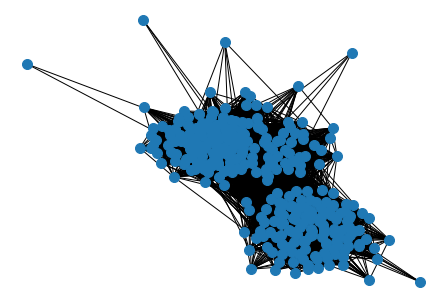

In [102]:
nx.draw(graph, with_labels=False, pos=nx.spring_layout(graph), node_size=100)

- 시각화는 별도의 소프트웨어 이용 추천 : [Gephi](https://gephi.org/)


In [79]:
nx.write_graphml_lxml(graph, "test.graphml", infer_numeric_types=True)